### Santiago García - Catalina Guatibonza

# PARCIAL 2 | MÉTODOS COMPUTACIONALES II

## Algoritmo Multipaso

## Particle Decay (Adaptativo) 

In [ ]:
#Integre (con odeint) el sistema de ecuaciones diferenciales con la condici´on inicial
#Ni(0) = [500, 0, 0] con i = A, B, C entre 0 y 10 horas con 50 pasos temporales.

In [9]:
import numpy as np
from scipy.integrate import odeint


def System(N, t):
    NA,NB,NC = N

    lambA = 0.5/h
    lambB =0.3/h

    dNAdt= -lambA*NA
    dNBdt= lambA*NA - lambB*NB
    dNCdt= lambB*NB
    return [dNAdt, dNBdt, dNCdt]

h = t[1] - t[0]
t = np.linspace(0,10,50)
r0 = np.array([500,0,0]) #condiciones inciciales
sol = odeint(System, r0, t)

NA = sol[:, 0]
NB = sol[:, 1]
NC = sol[:, 2]


In [10]:
np.max(NB)

229.29937499149233

In [11]:
NBmax = np.argmax(NB)
tmax = t[NBmax]
NCenNBmax = NC[NBmax]

NCenNBmax

159.13554513851162

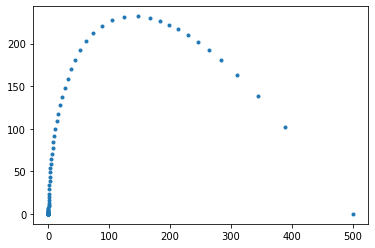

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#codigo del profe para rk4 vectorizado

def System(N, t):
    NA,NB,NC = N

    lambA = 0.5/h
    lambB =0.3/h

    dNAdt= -lambA*NA
    dNBdt= lambA*NA - lambB*NB
    dNCdt= lambB*NB
    return [dNAdt, dNBdt, dNCdt]


t = np.linspace(0,10,50)
r0 = np.array([500,0,0]) #condiciones inciciales
sol = odeint(System, r0, t)


# ayuda de chat gpt
def Increment(f, r, t, h):
    state1 = r
    K1 = np.array(f(state1, t)) 

    state2 = r + 0.5 * h * K1
    K2 = np.array(f(state2, t + 0.5 * h)) 
    state3 = r + 0.5 * h * K2
    K3 = np.array(f(state3, t + 0.5 * h))  

    state4 = r + h * K3
    K4 = np.array(f(state4, t + h))

    Deltaf = h * (K1 + 2 * K2 + 2 * K3 + K4) / 6

    return  r + Deltaf
###


def CheckStep(Delta1,Delta2,Delta3,h,minimo=1e-2,maximo=1e-1):
    
    tolerancia = 0.001
    
    Delta1 = np.abs(Delta1)
    Delta2 = np.abs(Delta2)
    Delta3 = np.abs(Delta3)
    
    if Delta1 < tolerancia:
        h = minimo
        dx = Delta1
        
    else:
        
        if np.abs((Delta1 - Delta2))/Delta1 > maximo:
            h = 0.5*h
            dx = Delta2
        
        elif np.abs((Delta1-Delta3))/Delta1 < minimo:
            h = 2*h
            dx = Delta3
        
        else:
            dx = Delta1
            
    return dx,h


def Adaptativo(f,x0,t):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    
    Time = np.array([t])
    Vector = r
    
    Steps = np.array([h])
    
    while t < tf:
        
        Delta1 = Increment(f,r,t,h)
        Delta2 = Increment(f,r,t,0.5*h)
        Delta3 = Increment(f,r,t,2*h)
    
        Deltas = Delta1.copy()
        ht = Delta1.copy()
        
        for i in range(Delta1.shape[0]):
            Deltas[i],ht[i] = CheckStep(Delta1[i],Delta2[i],Delta3[i],h)
    
    
        h = np.mean(ht)
        t += h
        
        r = Increment(f,r,t,h)
        
        
        Steps = np.append(Steps,h )
        Time = np.append(Time,t)
        Vector = np.vstack((Vector,r))
        
    return Time,Vector,Steps


t1,x1,h1 = Adaptativo(System,r0,t)

plt.scatter(x1[:,0],x1[:,1],marker='.')

In [13]:
np.max(NB)

229.29937499149233

In [14]:
NBmax = np.argmax(NB)
tmax = t[NBmax]
NCenNBmax = NC[NBmax]

NCenNBmax

159.13554513851162

In [15]:
#codigo del profe notas de clase

def System(N, t):
    NA,NB,NC = N

    lambA = 0.5/h
    lambB =0.3/h

    dNAdt= -lambA*NA
    dNBdt= lambA*NA - lambB*NB
    dNCdt= lambB*NB
    return [dNAdt, dNBdt, dNCdt]


t = np.linspace(0,10,50)
r0 = np.array([500,0,0]) #condiciones inciciales

def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf


def Adaptativo (f,x0,t,e=1e-4):
        
    h = t[1] - t[0]
    tf = t[-1]
    t = t[0]
    
    r = x0

    TimeVector = np.array([t])
    Vectors = np.array([r])
    
#Calcule $h$, $t_{0}$, $t_{f}$.
#Defina los vectores de tiempo y de soluci´on del sistema.

    while t < tf:

    # Avance h desde el punto actual

        r1 = Increment(f,r,t,h)

        # Avance h desde el siguiente punto

        r2 = Increment(f,r1,t+h,h)


        # Avance 2h desde el punto actual

        rt = Increment(f,r,t,2*h)

        # El error es comparar los avances
        #->h->h y ->2h en sus componentes

        error = np.linalg.norm( r2 - rt )

        # Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t += 2*h
            r = r*t
            # Si el error es muy grande, cambie el paso
            # Seg´un Fehlberg
            q = 0.85 * (e/error)**(1/4)
            h = h*q
            TimeVector = np.append(TimeVector, t)

            Vectors = np.vstack((Vector, r))
            

    return (TimeVector, Vectors)
 #-> Na,Nb,Nc
    




In [16]:
np.max(NB)

229.29937499149233

In [17]:
np.max(NC)

499.9994838589448